# Loading Data

**Data Link**
https://drive.google.com/file/d/1xMIOuGce8zig16sDQcTf7pXkRYfvQyp8/view?usp=sharing

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import data into google colab
from google.colab import files

uploaded = files.upload() # Directly import files from your system

Saving ipl_data.csv to ipl_data.csv


In [ ]:
# Load the data
ipl_data = pd.read_csv("/content/ipl_data.csv")
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


# Data Preprocessing

In [ ]:
# Check the shape of the data
rows = ipl_data.shape[0]
columns = ipl_data.shape[1]

print("The number of rows in the data is %d"%(rows))
print("The number of columns in the data is %d"%(columns))

The number of rows in the data is 76014
The number of columns in the data is 15


In [ ]:
# Check for Null Values
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
ipl_data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [ ]:
# Drop the unecessary columns like mid, striker and non striker
columns_to_drop = ['mid', 'striker', 'non-striker']
ipl_data.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
ipl_data.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222


In [ ]:
# Print all the teams
print(np.unique(ipl_data['bat_team']))

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


In [ ]:
# We don't want the teams which are not playing rn
all_teams = np.unique(ipl_data['bat_team'])
old_teams = ['Deccan Chargers', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiant', 'Pune Warriors', 'Rising Pune Supergiants']
current_teams = [teams for teams in all_teams if teams not in old_teams] 

# Use the rows which have current_teams
ipl_data = ipl_data[ipl_data['bat_team'].isin(current_teams) & ipl_data['bowl_team'].isin(current_teams)]

In [ ]:
ipl_data

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,UT Yadav,SL Malinga,106,9,18.1,29,4,107
75885,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,UT Yadav,SL Malinga,107,9,18.2,29,4,107
75886,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,AS Rajpoot,SL Malinga,107,9,18.3,28,4,107
75887,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,AS Rajpoot,SL Malinga,107,9,18.4,24,4,107


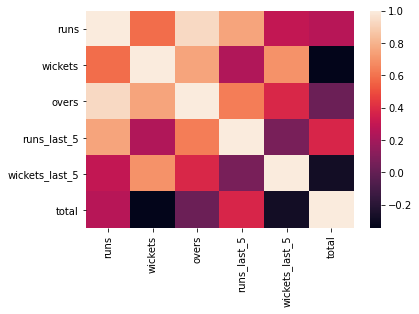

In [ ]:
# Check the correlation betweeen the numerical features
corr = ipl_data.corr()


# Plot the heatmaps using seaborn
import seaborn as sns
sns.heatmap(corr)

In [ ]:
corr

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.585470,0.936672,0.756638,0.298999,0.260193
wickets,0.585470,1.000000,0.753480,0.240959,0.696528,-0.345314
overs,0.936672,0.753480,1.000000,0.633673,0.384388,0.025120
runs_last_5,0.756638,0.240959,0.633673,1.000000,0.067445,0.375733
wickets_last_5,0.298999,0.696528,0.384388,0.067445,1.000000,-0.277322
total,0.260193,-0.345314,0.025120,0.375733,-0.277322,1.000000


**We observe multicolinearity here**

In [ ]:
# encode the categorical columns using pd.get_dummies
cat_cols = ['venue', 'bat_team', 'bowl_team', 'batsman','bowler']

# Let's check the number of unique values in cat_cols
for cols in cat_cols:
    n_unique = np.unique(ipl_data[cols]).shape[0]
    print("Number of unique values in %s column is %d"%(cols, n_unique))

Number of unique values in venue column is 31
Number of unique values in bat_team column is 8
Number of unique values in bowl_team column is 8
Number of unique values in batsman column is 349
Number of unique values in bowler column is 275


In [ ]:
# As expected 'batsman' and 'bowler' columns are having high cardinality. Hence, we will use label encoder for batsman and bowler column
from sklearn.preprocessing import LabelEncoder

le_columns = ['batsman', 'bowler', 'venue']
le = LabelEncoder() # Label Encoder object

for col in le_columns:
    ipl_data[col] = le.fit_transform(ipl_data[col]) # Label Encode the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ipl_data

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,276,168,1,0,0.1,1,0,222
1,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,1,0,0.2,1,0,222
2,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.2,2,0,222
3,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.3,2,0,222
4,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,324,230,106,9,18.1,29,4,107
75885,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,324,230,107,9,18.2,29,4,107
75886,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,36,230,107,9,18.3,28,4,107
75887,2017-05-19,13,Kolkata Knight Riders,Mumbai Indians,36,230,107,9,18.4,24,4,107


In [ ]:
nominal_cols = ['bat_team', 'bowl_team'] # one hot encode these columns

# One hot encode the columns and concat using pd.concat
ipl_data = pd.concat((ipl_data, pd.get_dummies(ipl_data[nominal_cols])), axis = 1)

In [ ]:
ipl_data.head()

,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,13,276,168,1,0,0.1,1,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,13,49,168,1,0,0.2,1,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,13,49,168,2,0,0.2,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,13,49,168,2,0,0.3,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,13,49,168,2,0,0.4,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Since, the nominal columns have been encoded now we don't have any use for those so, drop these columns
ipl_data.drop(nominal_cols, axis = 1, inplace = True)

In [ ]:
# Convert 
ipl_data['date'] = pd.to_datetime(ipl_data['date'])

In [ ]:
ipl_data['date'].dt.year

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
75884    2017
75885    2017
75886    2017
75887    2017
75888    2017
Name: date, Length: 53811, dtype: int64

In [ ]:
# Split the data into training and testing set
train_set = ipl_data[ipl_data['date'].dt.year <= 2015]
test_set = ipl_data[ipl_data['date'].dt.year > 2015]

print('Shape of training set is %d, %d'%(train_set.shape[0], train_set.shape[1]))
print('Shape of testing set is %d, %d'%(test_set.shape[0], test_set.shape[1]))

Shape of training set is 46267, 26
Shape of testing set is 7544, 26


In [ ]:
# Drop the date columns
train_set.drop(['date'], axis = 1, inplace = True)
test_set.drop(['date'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Performing the standardization on the train and test set
from sklearn.preprocessing import StandardScaler

# Fit the standard scaler
for column in train_set.columns:
  
  if column != 'total':
  # Standard Scaler object
    ss = StandardScaler()
    # Fit every column
    train_set[column] = ss.fit_transform(train_set[column].values.reshape((-1,1)))
'''(X-X.mean())/X.std()'''

# Similarly, scale the test set
for column in test_set.columns:

  if column != 'total':
    # Standard Scaler object
    ss = StandardScaler()
    # Fit every column
    test_set[column] = ss.fit_transform(test_set[column].values.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [ ]:
train_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,-0.347658,1.019795,0.315689,-1.505300,-1.202712,-1.673764,-2.146386,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
1,-0.347658,-1.312059,0.315689,-1.505300,-1.202712,-1.656445,-2.146386,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
2,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.656445,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
3,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.639125,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
4,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.621806,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722


In [ ]:
test_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
62066,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.684851,-2.018342,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62067,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.667531,-2.018342,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62068,-1.053301,-0.133250,-1.547011,-1.436325,-1.158339,-1.667531,-1.952746,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62069,-1.053301,-0.133250,-1.547011,-1.416762,-1.158339,-1.650212,-1.887150,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62070,-1.053301,0.399457,-1.547011,-1.416762,-1.158339,-1.632892,-1.887150,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815


In [ ]:
# Split the training and testing set into X and y
X_train, y_train = train_set.drop('total', axis = 1), train_set['total']
X_test, y_test = test_set.drop('total', axis = 1), test_set['total']

In [ ]:
X_train.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,-0.347658,1.019795,0.315689,-1.505300,-1.202712,-1.673764,-2.146386,-1.060749,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
1,-0.347658,-1.312059,0.315689,-1.505300,-1.202712,-1.656445,-2.146386,-1.060749,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
2,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.656445,-2.079747,-1.060749,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
3,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.639125,-2.079747,-1.060749,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
4,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.621806,-2.079747,-1.060749,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722


# Machine Learning Modelling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# Compute the metrics and return the results
def Compute_Metrics(y_true, y_pred):

    #1. MAE
    mae = mean_absolute_error(y_true, y_pred)
    #2. MSE
    mse = mean_squared_error(y_true, y_pred)
    #3. RMSE
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))

    try:
    #5. MSLE
      msle = mean_squared_log_error(y_true, y_pred)
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [msle]}
    except:
      metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [0]}

    # Create a DataFrame and storing all the metrics
    metrics_df = pd.DataFrame(data=metrics_dict) # Creating the DataFrame
    
    return  metrics_df# formatting the DataFrame to return results only upto 4 decimal places

In [ ]:
#1. K-Nearest Neighbours

from sklearn.neighbors import KNeighborsRegressor

# model object
knn = KNeighborsRegressor()

# Model Parameters
n_neighbors = list(np.arange(2, 100, 2))
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Create a parameters dictionary
params = {'n_neighbors' : n_neighbors,
          'weights' : weights,
          'algorithm' : algorithm
         }

# RSCV object
rscv_knn = RandomizedSearchCV(knn, params, n_iter = 2, n_jobs = -1, cv=5, refit = True, scoring = 'neg_mean_squared_error', random_state = 42)

# Fit the model
rscv_knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=2, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20, 22, 24, 26,
                                                        28, 30, 32, 34, 36, 38,
                                                        40, 42, 44, 46, 48, 50,
                                                        52, 

In [ ]:
# Let us check the best parameter
rscv_knn.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                    weights='uniform')

In [ ]:
# Make predictions on the test set and compute all the metrics
knn_pred = rscv_knn.predict(X_test)

# Compute metrics
knn_metrics = Compute_Metrics(y_test, knn_pred)

In [ ]:
knn_metrics

,MAE,MSE,RMSE,MSLE
0,23.829754,888.199801,29.802681,0.036395


In [ ]:
# 2. Linear Regression

'''Expected Outcome: Results will be poor because, the assumptions of Linear Regression (Predictors should be independent) is violated,
   because predictors or variables are showing co-linearity amongst themselves.'''

from sklearn.linear_model import LinearRegression

# Model Object
lr = LinearRegression() # No need for RandomizedSearchCV because Linear Regression requires almost no Hyperparameter Tuning

# Fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# testing the model
lr_pred = lr.predict(X_test)

# Compute metrics
lr_metrics = Compute_Metrics(y_test, lr_pred)

In [ ]:
lr_metrics

,MAE,MSE,RMSE,MSLE
0,2.847098e+13,1.288757e+27,3.589926e+13,0


**As expected the results are extremely poor.**

In [ ]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Model Object
dt_reg = DecisionTreeRegressor()

# Hyperparameter Tuning
criterion = ["mse", "friedman_mse", "mae", "poisson"]
splitter = ["best", "random"]
max_depth = list(np.arange(2,200,2))
min_samples_split = list(np.arange(1,100))
min_weight_fraction_leaf = list(np.linspace(0.0, 0.5))
max_features = ["auto", "sqrt", "log2"]
max_features.append(None)

# Set parameters
params = {'criterion':criterion,
          'splitter':splitter,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_weight_fraction_leaf':min_weight_fraction_leaf,
          'max_features':max_features
          }

# RSCV object
rscv_dt = RandomizedSearchCV(dt_reg, params, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
rscv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 16.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
# Check the best estimator
rscv_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=54,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=19,
                      min_weight_fraction_leaf=0.02040816326530612,
                      presort='deprecated', random_state=None,
                      splitter='random')

In [ ]:
# Make Predictions
dt_pred = rscv_dt.predict(X_test)

# Compute metrics
dt_metrics = Compute_Metrics(y_test, dt_pred)

In [ ]:
dt_metrics

,MAE,MSE,RMSE,MSLE
0,19.896542,687.820371,26.22633,0.031498


In [ ]:
# 4. Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model Object
rf_reg = RandomForestRegressor()

# Hyperparamters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# RandomizedSearchCv
rscv_rf = RandomizedSearchCV(rf_reg, params, n_iter=5, cv=5, verbose=1, random_state=42)

# Fit the model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 42.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Best Estimator
rscv_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Make predictions and compute metrics
rf_pred = rscv_rf.predict(X_test)

# Compute metric df
rf_metrics = Compute_Metrics(y_test, rf_pred)

In [ ]:
rf_metrics

,MAE,MSE,RMSE,MSLE
0,17.808172,519.543005,22.793486,0.022497


In [ ]:
# 5. XG Boost
from xgboost import XGBRegressor

# Model object
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

[13:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions
xgb_pred = xgb_reg.predict(X_test)

# Compute metrics
xgb_metric = Compute_Metrics(y_test, xgb_pred)

In [ ]:
np.round(xgb_pred)

array([156., 156., 156., ..., 118., 114., 114.], dtype=float32)

In [ ]:
xgb_metric

,MAE,MSE,RMSE,MSLE
0,16.601897,467.50313,21.621821,0.0202


In [ ]:
# Create a list of all the model metric dfs
metrics_df = pd.concat([knn_metrics, lr_metrics, dt_metrics, rf_metrics, xgb_metric])
metrics_df['Models'] = ['KNN', 'LR', 'DT', 'RF', 'XGB']
metrics_df.set_index('Models', inplace=True)

In [ ]:
transposed_metric_df = metrics_df.transpose() # Transpose the dataframe

In [ ]:
transposed_metric_df

Models,KNN,LR,DT,RF,XGB
MAE,23.829754,2.847098e+13,19.896542,17.808172,16.601897
MSE,888.199801,1.288757e+27,687.820371,519.543005,467.503130
RMSE,29.802681,3.589926e+13,26.226330,22.793486,21.621821
MSLE,0.036395,0.000000e+00,0.031498,0.022497,0.020200


In [ ]:
metrics_df.style.format('{:.2f}') #Format the dataframe

,MAE,MSE,RMSE,MSLE
Models,,,,
KNN,23.83,888.20,29.80,0.04
LR,28470977654195.66,1288757100523368519540146176.00,35899263230926.74,0.00
DT,19.90,687.82,26.23,0.03
RF,17.81,519.54,22.79,0.02
XGB,16.60,467.50,21.62,0.02


In [ ]:
metrics_df_ = metrics_df.drop('LR',axis=0)

In [ ]:
# Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

# Initialise the figure
fig = go.Figure(
            data=[
                  # 1. Plotting MAE
                  go.Bar(
                        name = 'MAE',
                        x=metrics_df_.index,
                        y=metrics_df_['MAE'],
                        offsetgroup=0
                  ),
                  # 2. Plotting MSE
                  go.Bar(
                        name = 'MSE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSE'],
                        offsetgroup=1
                  ),
                  # 3. Plotting RMSE
                  go.Bar(
                        name = 'RMSE',
                        x=metrics_df_.index,
                        y=metrics_df_['RMSE'],
                        offsetgroup=2
                  ),
                  # 4. Plotting MSLE
                  go.Bar(
                        name = 'MSLE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSLE'],
                        offsetgroup=3
                  )
            ],
            # Updating the layout
            layout=go.Layout(
                title='Metric Comparison of Various Models'
            )
)
fig.show()